Emigracia - ludia, ktori odchadzaju zo Slovenska

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# long table with data about emigration from Slovakia:
emigr = pd.read_csv('..\Data\slovakia\slovak_emigration_international.csv')
display(emigr)

,target_country,target_ISO3,target_region,target_sub_region,age,sex,country,country_ISO3,year,count
0,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,1998,0
1,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,1999,0
2,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2000,0
3,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2002,0
4,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2003,0
...,...,...,...,...,...,...,...,...,...,...
251969,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2019,0
251970,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2020,0
251971,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2021,0
251972,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2022,0


Celkova emigracia (kategoria: TOTAL) 1998 - 2023: 145258


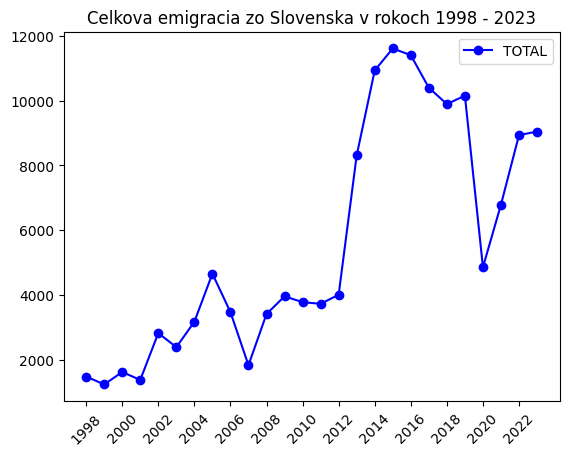

In [3]:
def draw_time_plot(axis, category, title):
    yearly_totals = emigr.query("age == @category and sex == 'Total'").groupby('year')['count'].sum()
    # display(yearly_totals)
    print(f"Celkova emigracia (kategoria: {category}) 1998 - 2023:", yearly_totals.sum())
    axis.plot(yearly_totals.index, yearly_totals, '-bo', label = category)
    axis.legend()
    axis.set_title(title)
    plt.xticks(list(range(1998,2024,2)), rotation = 45)
    return figure

figure, axis = plt.subplots()
figure = draw_time_plot(axis, 'TOTAL', 'Celkova emigracia zo Slovenska v rokoch 1998 - 2023')

count    145258
Name: TOTAL, dtype: int64


Text(0.5, 0, 'vek')

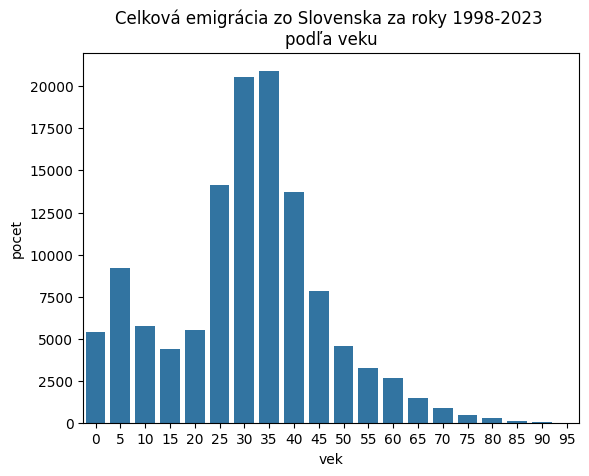

In [4]:
age_categories = pd.DataFrame(emigr.query("sex == 'Total'").groupby('age')['count'].sum())

total = age_categories.loc['TOTAL']
print(total)
by_five_years = age_categories.drop(['TOTAL', 'UNK', 'Y_GE100', 'Y_GE65', 'Y_GE85','Y_LT15','Y15-64'])
by_five_years.rename(index= {'Y_LT5':0,'Y10-14': 10,'Y15-19':15,'Y20-24':20,'Y25-29':25,'Y30-34':30,	'Y35-39':35,	'Y40-44':40,
                            'Y45-49':45,	'Y5-9'	:5,'Y50-54':50,	'Y55-59':55,'Y60-64':60,'Y65-69':65,'Y70-74':70,
                            'Y75-79':75,'Y80-84':80,'Y85-89':85,'Y90-94':90,'Y95-99':95,}, inplace = True )
by_five_years.sort_index(inplace=True)
# display(by_five_years)
podla_veku = sns.barplot(data = by_five_years, x = by_five_years.index, y = by_five_years['count'])
podla_veku.set_title("Celková emigrácia zo Slovenska za roky 1998-2023 \npodľa veku")
podla_veku.set_ylabel('pocet')
podla_veku.set_xlabel('vek')


In [5]:
# Copying function from useful-share.ipynb
import plotly.express as px

def draw_choropleth(data, column,range=None,save_name=None,title="",scale=""):
  if range is not None:
    fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant",
      range_color=range
    )
  else:
      fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant"
      )

  fig.update_geos(lonaxis_range= [-20, 40],lataxis_range= [30, 72])
  fig.update_layout(height=500, margin={"r":0,"t":50,"l":0,"b":30},
                    title={
        'text': title,
        'y':0.96,  # Position from top (0 to 1)
        'x':0.5,    # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=18) })
  
  
  #I used Deepseek AI to write this code
  if save_name:
    try:
      fig.write_image(f"../Images/Maps/{save_name}.png", scale=4)
      print(f"Successfully saved to {save_name}.png")
    except Exception as e:
      print(f"Could not save PNG: {str(e)}")
      print("Install kaleido with: pip install -U kaleido")
  else:
    fig.show()

In [6]:
import sys
print(sys.executable)

c:\Python310\python.exe


In [7]:
into_countries = emigr.query("sex == 'Total'").loc[:,['target_ISO3', 'count']].groupby('target_ISO3').sum()
print(into_countries['count'].sum())
display(into_countries)
draw_choropleth(into_countries, column = 'count', save_name=False)


131787


,count
target_ISO3,
ABW,3
AFG,10
AGO,7
AIA,0
ALB,9
...,...
WSM,0
YEM,6
ZAF,79
